### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

In [0]:
from google.colab import drive

In [3]:
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [63]:
tf.__version__

'1.12.0'

### Collect Data

In [0]:
import keras

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [67]:
print(testY[0:5])

[9 2 1 1 6]


In [68]:
# Shape of Train and Test Data

print("Train X:",trainX.shape)

print("Train Y:",trainY.shape)

print("Test X:",testX.shape)

print("Test Y:",testY.shape)

('Train X:', (60000, 28, 28))
('Train Y:', (60000,))
('Test X:', (10000, 28, 28))
('Test Y:', (10000,))


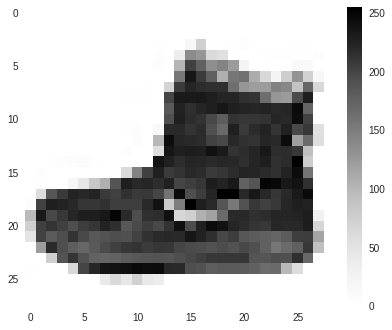

In [69]:
#Preprocess the data
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(False)

In [0]:
#We scale these values to a range of 0 to 1 before feeding to the neural network model
trainX = trainX / 255.0

testX = testX / 255.0

### Visualize the data

Plot first 10 images in the triaining set and their labels.

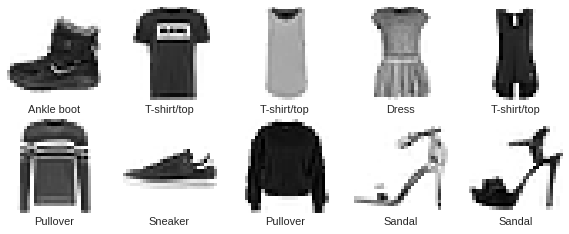

In [71]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [72]:
# One hot encoding for output label

trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

print("Train Y:",trainY.shape)

print("Test Y:",testY.shape)

('Train Y:', (60000, 10))
('Test Y:', (10000, 10))


In [73]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))


#Add Output Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [75]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 135us/step - loss: 0.8262 - acc: 0.7411 - val_loss: 0.6534 - val_acc: 0.7850
Epoch 2/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.5916 - acc: 0.8084 - val_loss: 0.5837 - val_acc: 0.8043
Epoch 3/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.5420 - acc: 0.8217 - val_loss: 0.5511 - val_acc: 0.8130
Epoch 4/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.5157 - acc: 0.8290 - val_loss: 0.5304 - val_acc: 0.8194
Epoch 5/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.4980 - acc: 0.8336 - val_loss: 0.5169 - val_acc: 0.8262
Epoch 6/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.4853 - acc: 0.8379 - val_loss: 0.5130 - val_acc: 0.8240
Epoch 7/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.4757 - acc: 0.8398 - val_loss: 0.5037 - 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Creating Ne Graph with Batch Normalization Layer

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [77]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.5939 - acc: 0.7960 - val_loss: 0.5132 - val_acc: 0.8201
Epoch 2/50
60000/60000 [==============================] - 7s 125us/step - loss: 0.4879 - acc: 0.8312 - val_loss: 0.4821 - val_acc: 0.8292
Epoch 3/50
60000/60000 [==============================] - 8s 125us/step - loss: 0.4696 - acc: 0.8369 - val_loss: 0.4740 - val_acc: 0.8340
Epoch 4/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.4567 - acc: 0.8425 - val_loss: 0.4675 - val_acc: 0.8352
Epoch 5/50
60000/60000 [==============================] - 8s 125us/step - loss: 0.4485 - acc: 0.8446 - val_loss: 0.4607 - val_acc: 0.8385
Epoch 6/50
60000/60000 [==============================] - 8s 126us/step - loss: 0.4429 - acc: 0.8473 - val_loss: 0.4589 - val_acc: 0.8425
Epoch 7/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.4381 - acc: 0.8473 - val_loss: 0.4651 - 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

#Comile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### **Model Execution without Batching**

In [79]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 125us/step - loss: 0.9413 - acc: 0.6789 - val_loss: 0.6819 - val_acc: 0.7647
Epoch 2/50
60000/60000 [==============================] - 8s 125us/step - loss: 0.6443 - acc: 0.7767 - val_loss: 0.6034 - val_acc: 0.7902
Epoch 3/50
60000/60000 [==============================] - 7s 125us/step - loss: 0.5881 - acc: 0.7971 - val_loss: 0.5702 - val_acc: 0.8033
Epoch 4/50
60000/60000 [==============================] - 8s 126us/step - loss: 0.5609 - acc: 0.8065 - val_loss: 0.5489 - val_acc: 0.8119
Epoch 5/50
60000/60000 [==============================] - 8s 126us/step - loss: 0.5423 - acc: 0.8145 - val_loss: 0.5347 - val_acc: 0.8169
Epoch 6/50
60000/60000 [==============================] - 8s 125us/step - loss: 0.5261 - acc: 0.8189 - val_loss: 0.5245 - val_acc: 0.8190
Epoch 7/50
60000/60000 [==============================] - 8s 126us/step - loss: 0.5172 - acc: 0.8218 - val_loss: 0.5169 - 

###**Model Execution with Batching**

In [80]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.4352 - acc: 0.8499 - val_loss: 0.4580 - val_acc: 0.8400
Epoch 2/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.4327 - acc: 0.8511 - val_loss: 0.4569 - val_acc: 0.8394
Epoch 3/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.4343 - acc: 0.8498 - val_loss: 0.4566 - val_acc: 0.8408
Epoch 4/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.4328 - acc: 0.8504 - val_loss: 0.4561 - val_acc: 0.8406
Epoch 5/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.4329 - acc: 0.8507 - val_loss: 0.4556 - val_acc: 0.8416
Epoch 6/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.4326 - acc: 0.8503 - val_loss: 0.4572 - val_acc: 0.8407
Epoch 7/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.4321 - acc: 0.8510 - val_loss: 0.4555 - 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model_nn = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_nn.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_nn.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model_nn.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nd hidden layer
model_nn.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 3rd hidden layer
model_nn.add(tf.keras.layers.Dense(10, activation='sigmoid'))

#Add Dense Layer which provides 10 Outputs after applying softmax
model_nn.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Comile the model
model_nn.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [82]:
model_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

### **Model Execution with Batching**

In [83]:
model_nn.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 165us/step - loss: 1.7982 - acc: 0.3868 - val_loss: 1.3086 - val_acc: 0.5524
Epoch 2/50
60000/60000 [==============================] - 10s 160us/step - loss: 1.1397 - acc: 0.6083 - val_loss: 0.9692 - val_acc: 0.6609
Epoch 3/50
60000/60000 [==============================] - 10s 160us/step - loss: 0.8823 - acc: 0.6995 - val_loss: 0.7654 - val_acc: 0.7493
Epoch 4/50
60000/60000 [==============================] - 10s 159us/step - loss: 0.7159 - acc: 0.7587 - val_loss: 0.6496 - val_acc: 0.7756
Epoch 5/50
60000/60000 [==============================] - 10s 158us/step - loss: 0.6275 - acc: 0.7830 - val_loss: 0.5852 - val_acc: 0.7960
Epoch 6/50
60000/60000 [==============================] - 10s 160us/step - loss: 0.5710 - acc: 0.8063 - val_loss: 0.5384 - val_acc: 0.8228
Epoch 7/50
60000/60000 [==============================] - 10s 160us/step - loss: 0.5212 - acc: 0.8271 - val_loss: 0.

### **Save Model**

In [0]:
model_nn.save('fashion_mnist_dnn.h5')

### **Prediction**

In [85]:
#Actual Label for the first example in test dataset
print(testY[0])

#Model prediction
prediction = model_nn.predict(testX[0:1])

#Print prediction
print(prediction[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[5.7900320e-06 7.9556885e-05 3.5578717e-07 1.2093326e-03 5.1465645e-06
 9.6867845e-04 3.4251484e-06 7.6284977e-03 1.6070567e-03 9.8849213e-01]


### **Prediction with Highest probability**

In [86]:
import numpy as np

#Get predicted number with highest probability
predicted_num = np.argmax(prediction[0])

#Print the number
print(predicted_num)

9


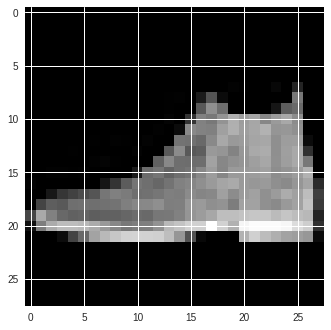

In [87]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(testX[0],cmap='gray')